In [34]:
library(tidyverse)
library(readxl)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(cowplot)

Warning message:
“package ‘cowplot’ was built under R version 4.0.3”


In [2]:
set.seed(19)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
download.file(url, "data/credit_default.xls")
cd <- read_excel("data/credit_default.xls", skip = 1)
head(cd)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [17]:
colnames(cd) <- make.names(colnames(cd))
head(cd)

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


In [56]:
set.seed(19)
rows <- sample(nrow(cd))
df <- cd[rows, ]
cd_5000 <- slice(df, 1:5000) %>%
rename(default_nm = default.payment.next.month) %>%
mutate(usage_cdt = ((BILL_AMT1 + BILL_AMT2 + BILL_AMT3 + BILL_AMT4 + BILL_AMT5 + BILL_AMT6)/6)/LIMIT_BAL) %>%
mutate(pmt = ((PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6)/6)/LIMIT_BAL) %>%
mutate(diff_usage_pmt = usage_cdt - pmt)

d1 <- filter(cd_5000, default_nm == 1)

d0 <- filter(cd_5000, default_nm ==0)

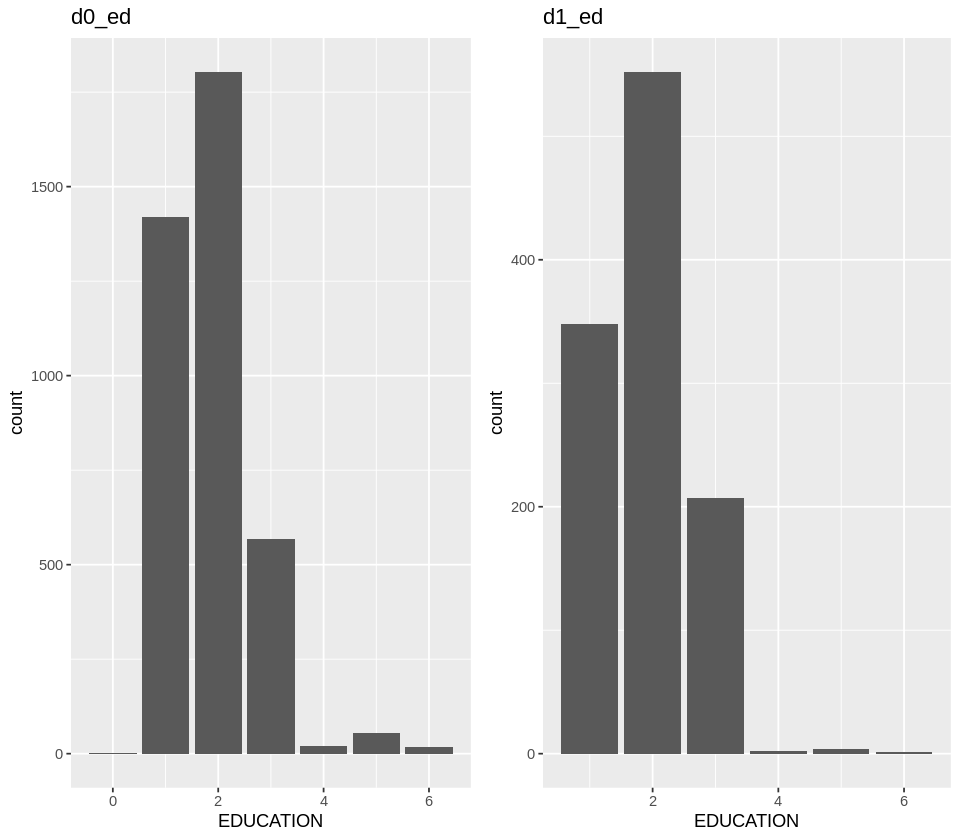

In [37]:
d1_ed <- d1 %>%
ggplot(aes(x=EDUCATION)) +
geom_bar() +
ggtitle("d1_ed")

d0_ed <- d0 %>%
ggplot(aes(x=EDUCATION)) +
geom_bar() +
ggtitle("d0_ed")

plot_grid(d0_ed, d1_ed)
#Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)

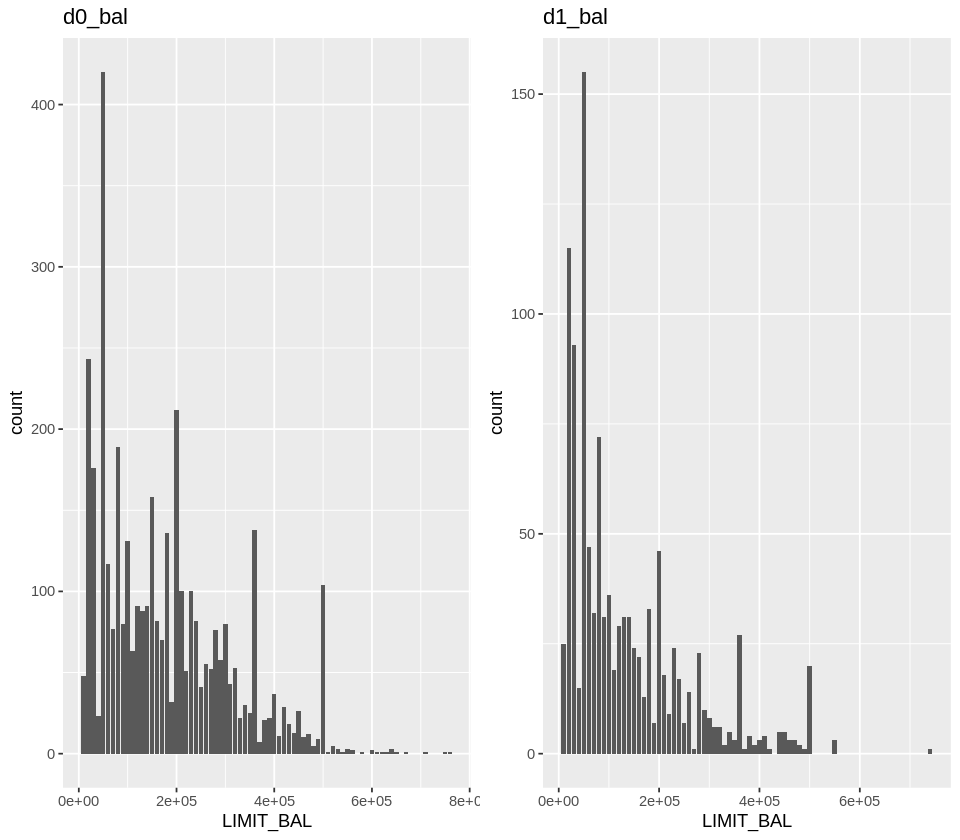

In [39]:
d1_bal <- d1 %>%
ggplot(aes(x=LIMIT_BAL)) +
geom_bar() +
ggtitle("d1_bal")

d0_bal <- d0 %>%
ggplot(aes(x=LIMIT_BAL)) +
geom_bar() +
ggtitle("d0_bal")

plot_grid(d0_bal, d1_bal)

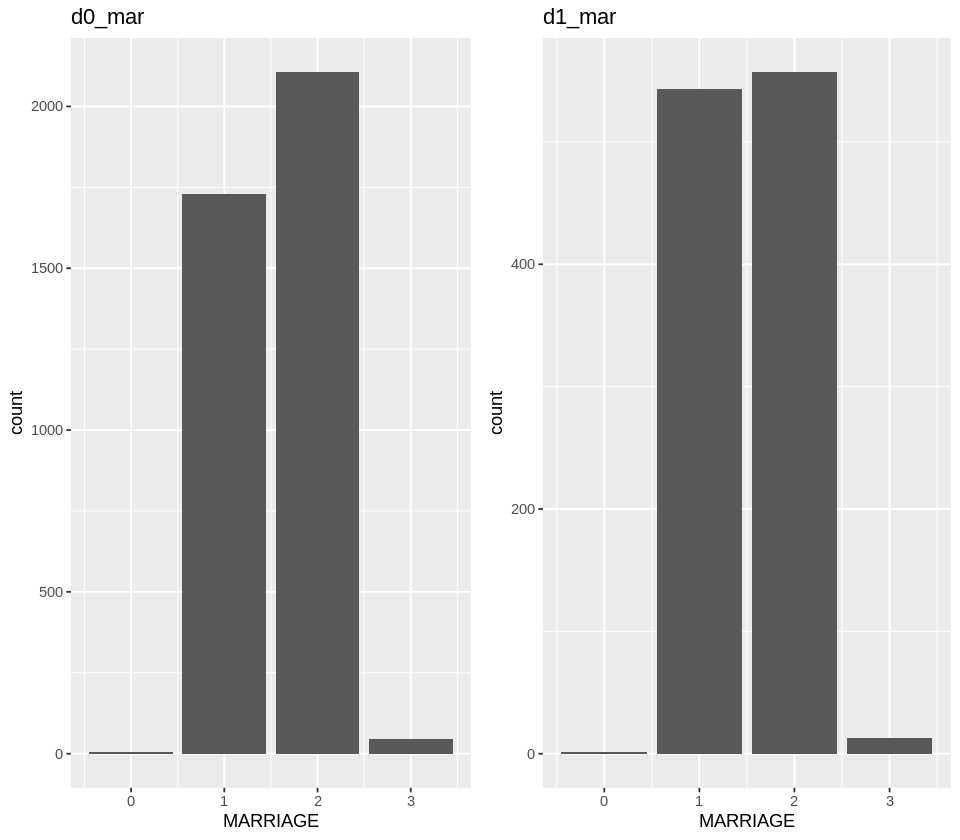

In [65]:
d1_mar <- d1 %>%
ggplot(aes(x=MARRIAGE)) +
geom_bar() +
ggtitle("d1_mar")

d0_mar <- d0 %>%
ggplot(aes(x=MARRIAGE)) +
geom_bar() +
ggtitle("d0_mar")

plot_grid(d0_mar, d1_mar)

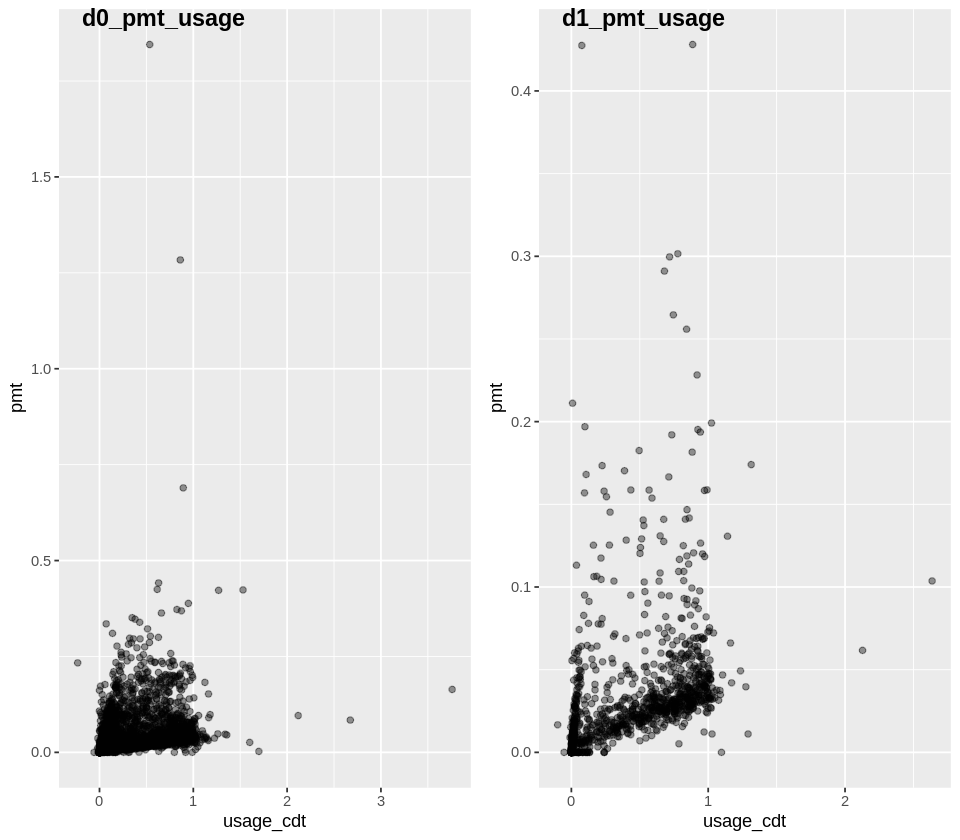

In [53]:
d0_pmt_usage <- d0 %>%
ggplot(aes(x=usage_cdt, y=pmt)) +
geom_point(alpha=0.4)

d1_pmt_usage <- d1 %>%
ggplot(aes(x=usage_cdt, y=pmt)) +
geom_point(alpha=0.4)

plot_grid(d0_pmt_usage, d1_pmt_usage, labels= c('d0_pmt_usage', 'd1_pmt_usage'))

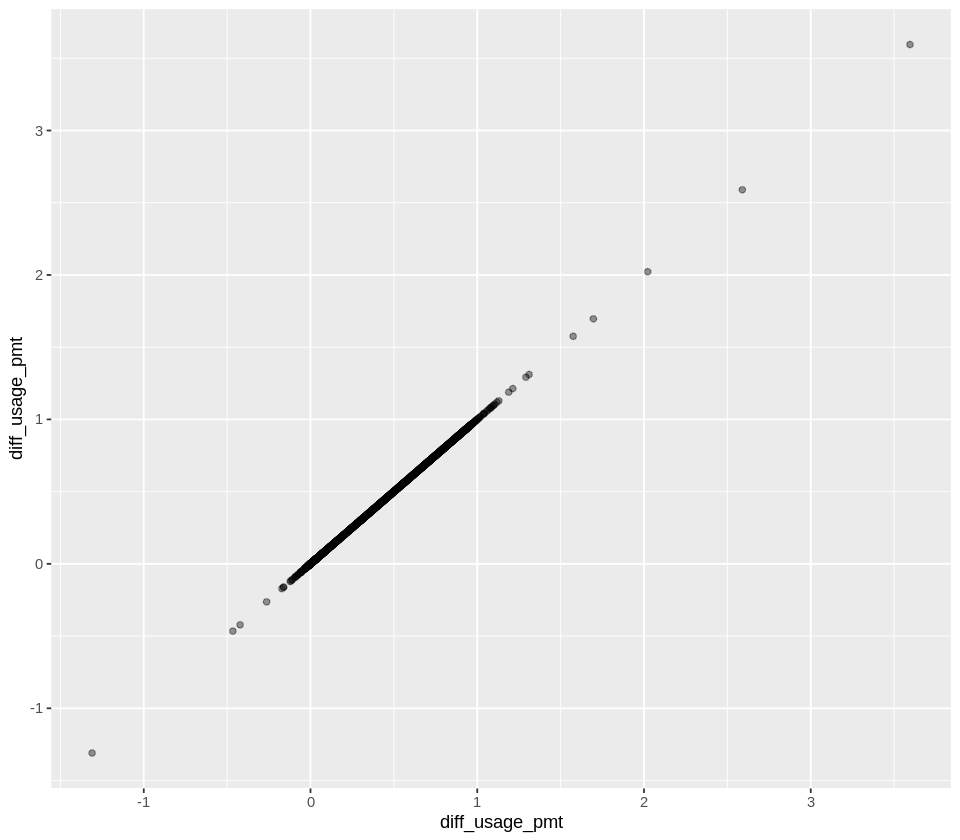

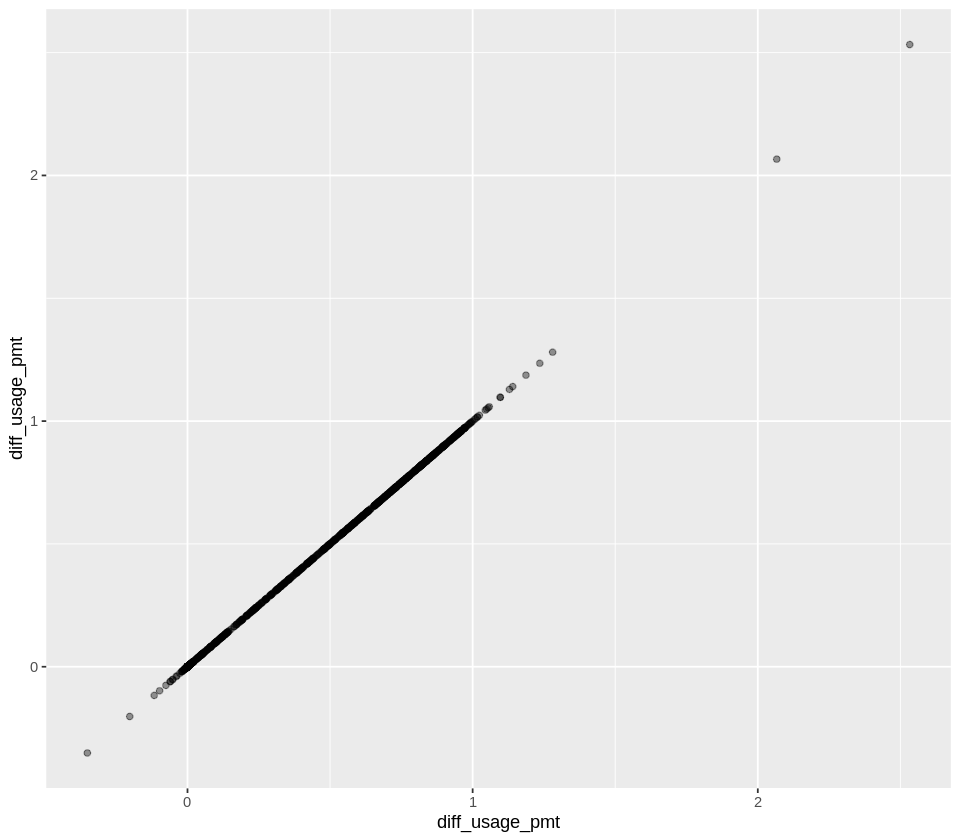

In [61]:
d0_diff <- d0 %>%
ggplot(aes(x=diff_usage_pmt, y=diff_usage_pmt)) +
geom_point(alpha=0.4)
d0_diff

d1_diff <- d1 %>%
ggplot(aes(x=diff_usage_pmt, y=diff_usage_pmt)) +
geom_point(alpha=0.4)
d1_diff

In [54]:
cd_split <- initial_split(cd_5000, prop=0.75, strata=default_nm)
cd_training <- training(cd_split)
cd_testing <- testing(cd_split)

In [64]:
cd_model <- glm(default_nm ~ LIMIT_BAL + MARRIAGE + usage_cdt + pmt, data = cd_training, family = binomial(link="logit"))
summary(cd_model)


Call:
glm(formula = default_nm ~ LIMIT_BAL + EDUCATION + MARRIAGE + 
    usage_cdt + pmt, family = binomial(link = "logit"), data = cd_training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.2065  -0.7701  -0.6296  -0.4096   2.5538  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.069e-01  1.984e-01  -1.547  0.12195    
LIMIT_BAL   -3.117e-06  3.999e-07  -7.794 6.48e-15 ***
EDUCATION   -4.462e-02  5.064e-02  -0.881  0.37824    
MARRIAGE    -2.464e-01  7.799e-02  -3.159  0.00158 ** 
usage_cdt    5.248e-01  1.247e-01   4.208 2.58e-05 ***
pmt         -6.086e+00  1.141e+00  -5.334 9.62e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3980.0  on 3750  degrees of freedom
Residual deviance: 3841.1  on 3745  degrees of freedom
AIC: 3853.1

Number of Fisher Scoring iterations: 4
